# Logistic Regression and Classification Error Metrics

## Introduction

Dataset: [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database,  
which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities:
- walking
- walking upstairs, 
- walking downstairs, 
- sitting, 
- standing, 
- laying.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website above.

# Importing Libraries

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [24]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data = pd.read_csv(filepath, sep=',')

## EDA: Exploratory Data Analysis

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

In [31]:
# Look at the first 5 lines in the dataset
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [32]:
# Some basic statistics about the dataset
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# From the information above you see that all the data is normalized between -1.0 and 1.0
# Check the datatypes used in this dataset
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [36]:
# Show the last 5 datatypes
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [41]:
# Checking activity feature
data.Activity.value_counts()

0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: Activity, dtype: int64

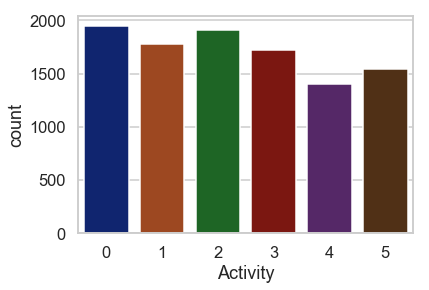

In [44]:
# Visualisation of the activity feature
sns.set_style('whitegrid')
sns.countplot(x="Activity", data=data)

Scikit learn classifiers won't accept a sparse matrix for the prediction column. 
Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

# Data Cleaning

Scikit learn classifiers won't accept a sparse matrix for the prediction column. 
Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

5895     2
4184     2
450      3
100      3
10023    3
Name: Activity, dtype: int64

## Statistics

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [49]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

### A histogram of the absolute value correlations.

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

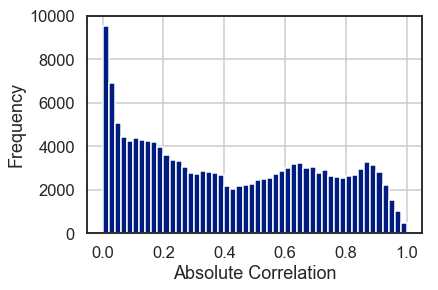

In [52]:
ax = corr_values.abs_correlation.hist(bins=50)
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [12]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
92472,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
156049,fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-sma(),1.000000,1.000000
95316,tBodyAccMag-arCoeff()1,tGravityAccMag-arCoeff()1,1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
95667,tBodyAccMag-arCoeff()2,tGravityAccMag-arCoeff()2,1.000000,1.000000


# Building a Logistic Regression Model

## Train Test Split

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [56]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [57]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Training

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitting a multi-class model so you understand the coefficient output. Store the model.
* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

In [58]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression().fit(X_train, y_train)

In [59]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
# L1 is also called Lasso (Least Absolute Shrinkage and Selection Operator) Regression, 
# adds "absolute value of magnitude" of coëfficient as penalty term to the loss function
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [60]:
# L2 regularized logistic regression
# L2 is also called Ridge Regression, adds "squared magnitude" of coëfficient as penalty term to the loss function
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2').fit(X_train, y_train)

## Comparing both models 

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [65]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 labels=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
256 -0.032050 -0.207689  0.111676  0.197816 -0.173262 -0.095728  0.000000   
278  0.025981 -0.201404  0.370876  0.351882 -0.157108 -0.072707  0.000000   
12  -0.057144  0.466800  0.158404 -0.112620  0.892966 -0.742814  0.000000   
143 -0.201758 -0.080515  0.147956 -0.714691  0.981977  0.196261 -0.376796   
411 -0.006782  0.191393  0.141141 -0.240746  0.209581 -0.157333  0.000000   
454  0.344511 -1.234680  0.961246  0.054071  0.092767  0.041937  0.000000   
44   0.037604  0.203505  0.741451  0.217586  0.086829  0.004395  0.000000   
252 -0.030255 -0.188538  0.091225  0.246751 -0.056220 -0.298604  0.000000   
484  0.002472  0.231954  0.265862  0.135484  0.213742  0.320182  0.000000   
534 -0.011926  0.244625  0.058204 -0.066988  0.129841 -0.266599  0.000000   

                                                             l2            \
            1         2         3         4         5         0         1   
256  0.000000  0.000000  0.016279 -0.089564  0.000000 -0.062209 -0.450748   
278  0.000000  0.000000  0.642987 -0.112569  0.000000  0.044491 -0.550849   
12   0.622795  0.000000  0.000000  2.751348 -1.993763 -0.166526  0.675097   
143 -0.728154  0.131623 -0.584355  3.402894  0.000000 -0.589783 -0.298330   
411  0.000000  0.002163  0.000000  0.171067 -0.000286 -0.046516  0.182084   
454 -1.864998  0.822317  0.000000  0.000000  0.000000  0.537723 -1.806557   
44   0.528548  1.689893  0.126346  0.003398  0.000000  0.008447  0.040116   
252  0.000000  0.000000  0.000000  0.000000 -0.394710 -0.067714 -0.379707   
484  0.242483  0.340268  0.000000  0.073052  0.265881 -0.035250  0.181374   
534  0.050568  0.000000  0.000000  0.051636 -0.265472 -0.061749  0.269570   

                                             
            2         3         4         5  
256  0.201748  0.308581 -0.296406 -0.273741  
278  0.554580  1.217694 -0.445430 -0.491447  
12   0.133108 -1.022103  1.661751 -1.850614  
143  0.188565 -2.070830  1.930053  0.208435  
411  0.090237 -0.624348  0.259978 -0.664189  
454  1.457647  0.270981 -0.008066  0.391107  
44   0.942413  0.149950 -0.020234 -0.474417  
252  0.243449  0.748759 -0.038892 -0.636136  
484  0.232351  0.089474  0.164241  0.249900  
534 -0.025089 -0.053061  0.406662 -0.705560

Prepare six separate plots for each of the multi-class coefficients.

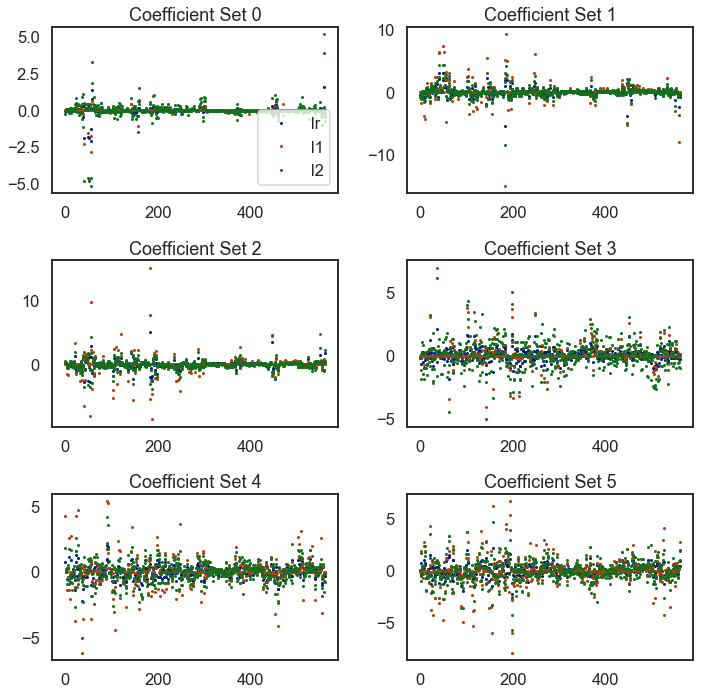

In [66]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Predicting

* Predict and store the class for each model.
* Also store the probability for the predicted class for each model. 

In [67]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [68]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.999019,0.999818
1,0.988165,0.999651,0.999507
2,0.987592,0.995346,0.998511
3,0.981381,0.999163,0.994571
4,0.998277,0.999924,0.999631


## Model Evaluation

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix

In [69]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [70]:
metrics

,lr,l1,l2
precision,0.984144,0.983833,0.984150
recall,0.984142,0.983819,0.984142
fscore,0.984143,0.983817,0.984141
accuracy,0.984142,0.983819,0.984142
auc,0.990384,0.990148,0.990358


Accuracy: (TP1 + TP2 + TP 3 + ...) / Total  
AUC: Area Under Curve (x-axis => FP rate, y-axis => TP rate)  
fscore:  2 * (Precision * Recall) / (Precision + Recall)  
precision: TP / (TP + FP)  
recall: TP / (FP + FN)  

## Confusion Matrix for Each Model

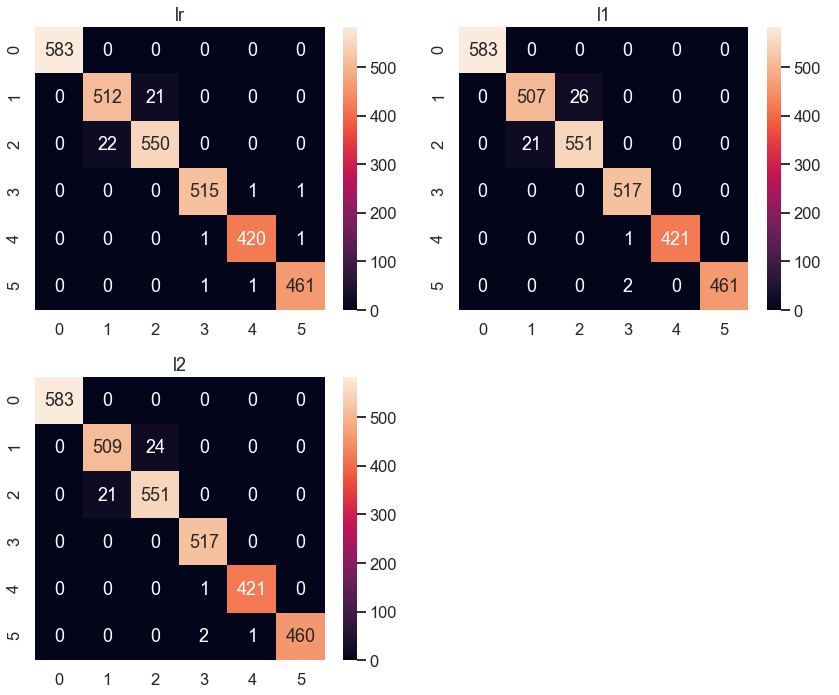

In [71]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.lr))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       583
          1       0.96      0.96      0.96       533
          2       0.96      0.96      0.96       572
          3       1.00      1.00      1.00       517
          4       1.00      1.00      1.00       422
          5       1.00      1.00      1.00       463

avg / total       0.98      0.98      0.98      3090



In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.l1))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       583
          1       0.96      0.95      0.96       533
          2       0.95      0.96      0.96       572
          3       0.99      1.00      1.00       517
          4       1.00      1.00      1.00       422
          5       1.00      1.00      1.00       463

avg / total       0.98      0.98      0.98      3090



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.l2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       583
          1       0.96      0.95      0.96       533
          2       0.96      0.96      0.96       572
          3       0.99      1.00      1.00       517
          4       1.00      1.00      1.00       422
          5       1.00      0.99      1.00       463

avg / total       0.98      0.98      0.98      3090

